In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_data = pd.read_csv("Salary_Data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# 1.Initial investigation

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

# 2.Assumption check

In [6]:
x=salary_data['YearsExperience']
y=salary_data['Salary']

In [7]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Salary')

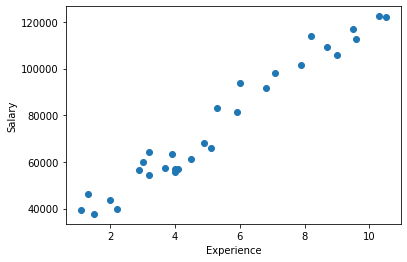

In [8]:
plt.scatter(x,y)
plt.xlabel('Experience')
plt.ylabel('Salary')

In [9]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

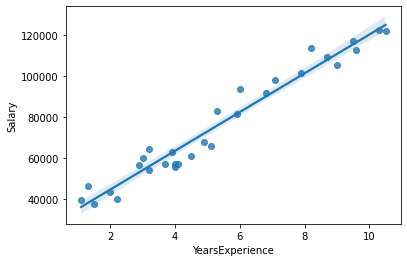

In [10]:
sns.regplot(x,y)

<AxesSubplot:ylabel='Density'>

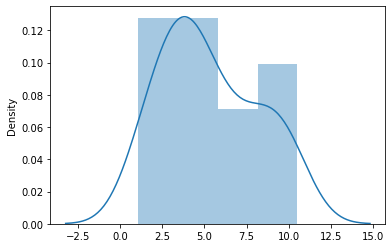

In [11]:
sns.distplot(x=salary_data['YearsExperience'])

<AxesSubplot:ylabel='Density'>

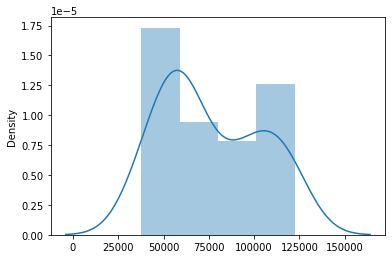

In [12]:
sns.distplot(x=salary_data['Salary'])

# 3.Model Training

In [13]:
import statsmodels.formula.api as smf

In [14]:
model = smf.ols('Salary~YearsExperience',data=salary_data).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        11:10:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4.Model Testing

In [16]:
y_pred=model.predict(x)

# 5.Model Evaluation

In [17]:
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
print("Mean square error:",mean_squared_error(y,y_pred))
print("r2_score:",r2_score(y,y_pred))

Mean square error: 31270951.72228097
r2_score: 0.9569566641435086
